# 📓 Chapter 5 Notebook  
## Fluid Dynamics in Biology and Medicine  
### *Blood Flow, Resistance, and Oxygen Transport*

In this notebook we move from *static fluids* to **fluids in motion**, with a strong
focus on **circulatory physiology**.

We introduce slightly more complex code *only where it clearly improves visualization*.
All advanced sections are **pre-filled**.


---
## 🧠 Learning Goals

By the end of this notebook, you will be able to:

- Understand that for incompressible fluids, what goes in - must come out (mass conservation)
- Explain why fluid speeds up in narrow regions
- Use the continuity equation to relate velocity and cross-sectional area
- Apply these ideas to simple biological systems such as blood vessels
- Use **Poiseuille’s Law** to model blood flow in vessels
- Explain why vessel **radius** dominates resistance
- Visualize how **viscosity** affects flow
- Model **stenosis (narrowing)** and its impact on circulation



---
## ✅ Setup (run once)

If you see errors about missing packages, run the next cell once and restart the kernel.


In [ ]:
%pip install matplotlib numpy

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math

---
## Part 1A — Water speeding up in a narrowing vessel

When a fluid flows steadily through a pipe or vessel, it does not accumulate or disappear along the way. If the fluid is incompressible (a very good approximation for liquids like water and blood), then the volume of fluid entering a region per unit time must equal the volume leaving.

This idea is known as conservation of mass, and in fluid dynamics it is often expressed in terms of flow rate.

The volumetric flow rate $Q$ is defined as: $$Q=Av$$

where
$A$ is the cross-sectional area and $v$ is the average flow velocity. If the fluid is incompressible and the flow is steady, then:

$$A_1v_1=A_2v_2=Q$$

This relationship is called the continuity equation. Before using equations, let’s think intuitively.

Imagine cars on a highway. If three lanes suddenly merge into one, cars must either:

- slow down and pile up, or
- speed up to maintain the same throughput

In a steady flow, piling up is not allowed — fluid cannot accumulate. Therefore, velocity must increase when area decreases.

We will now explore this idea using a simple numerical model.



The continuity equation states that velocity changes are driven entirely by changes in cross-sectional area. We can simulate how this could impact the blood velocity in a blood vessel that has a narrowing in it.

To make this relationship explicit, we will plot cross-sectional area and velocity on the same graph, using two vertical axes. This allows us to directly compare how one responds to the other along the vessel.

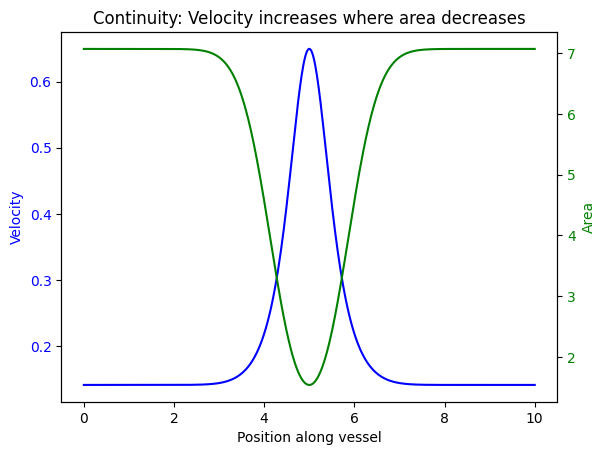

In [3]:
# Vessel geometry
x = np.linspace(0, 10, 500) # 500 points spaced between 0 and 10
radius = 1.5 - 0.8 * np.exp(-(x-5)**2)   # smooth narrowing
area = np.pi * radius**2

Q = 1.0  # arbitrary constant flow rate
velocity = Q / area

fig, ax1 = plt.subplots()

# Plot velocity
ax1.plot(x, velocity, 'b', label="Velocity")
ax1.set_xlabel("Position along vessel")
ax1.set_ylabel("Velocity", color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Second axis for area
ax2 = ax1.twinx()
ax2.plot(x, area, 'g', label="Cross-sectional area")
ax2.set_ylabel("Area", color='g')
ax2.tick_params(axis='y', labelcolor='g')

plt.title("Continuity: Velocity increases where area decreases")
plt.show()

This plot highlights the key result of the continuity equation:

- Where the area decreases, the velocity increases

- Where the area increases, the velocity decreases

No assumptions about pressure, forces, or energy were required to produce this result. The relationship follows purely from conservation of mass in an incompressible fluid.

This visualization makes it clear that geometry alone can strongly influence fluid velocity.

---
## Part 1B — Capillaries vs aorta (small vs large vessels)

In the circulatory system, blood flows from large arteries into extremely narrow capillaries. We can use the continuity equation to estimate how velocity must change between these regions. The following block of code predicts the percentage difference in blood velocity between the capillary and the aorta.

In [ ]:
A_aorta = 3.0      # cm^2
A_capillary = 0.01  # cm^2

v_aorta = 0.3      # m/s
Q = A_aorta * v_aorta

v_capillary = Q / A_capillary

v_capillary/v_aorta *100

0.05

This simple calculation predicts extremely high velocities in capillaries — far higher than what is observed physiologically. 

This simplistic example is suggesting that all the blood from the aorta flows through a single capillary. This is clearly not accounting for the branching of the vasculature which would require using the combined cross-sectional area across all capillaries! This value is closer to 6000 $cm^2$. Try using this value in the above cell to see if the result is more sensible.

The continuity equation alone is not sufficient to describe real biological flows. We will see how viscosity and energy loss dramatically alter this picture.

---
## Part 2A — Horizontal pipe: velocity ↔ pressure tradeoff

The continuity equation tells us how velocity changes, but it does not explain why fluid accelerates or decelerates. To understand this, we need to consider energy.

In fluid dynamics, pressure plays a role similar to potential energy: regions of high pressure can push fluid into regions of lower pressure, causing acceleration.

For steady, incompressible flow along a streamline, Bernoulli’s equation states:
$$ P+ \frac{1}{2}ρv^2 +\rho g h =constant $$

If the flow is horizontal, the height term does not change, and the equation simplifies to:

$$ P+ \frac{1}{2}ρv^2=constant $$

This means that pressure energy and kinetic energy trade off along the flow.

Using the velocity profile we calculated above, we can now compute how pressure must vary in order to conserve energy.

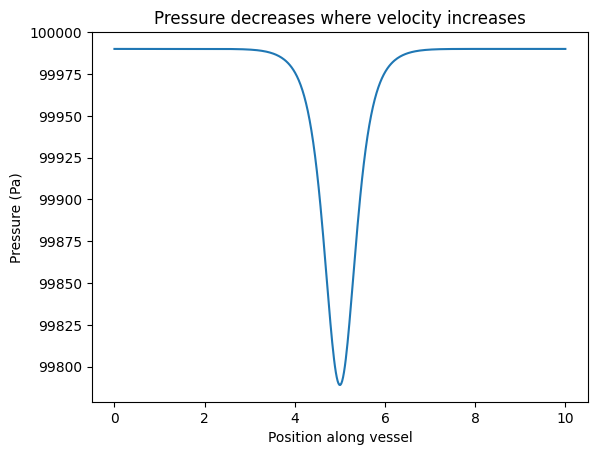

In [ ]:
rho = 1000  # kg/m^3

pressure = 1e5 - 0.5 * rho * velocity**2 # where 1e5 is adding 1 atm in Pascal units

plt.figure()
plt.plot(x, pressure)
plt.xlabel("Position along vessel")
plt.ylabel("Pressure (Pa)")
plt.title("Pressure decreases where velocity increases")
plt.show()

Now overlay velocity and pressure:

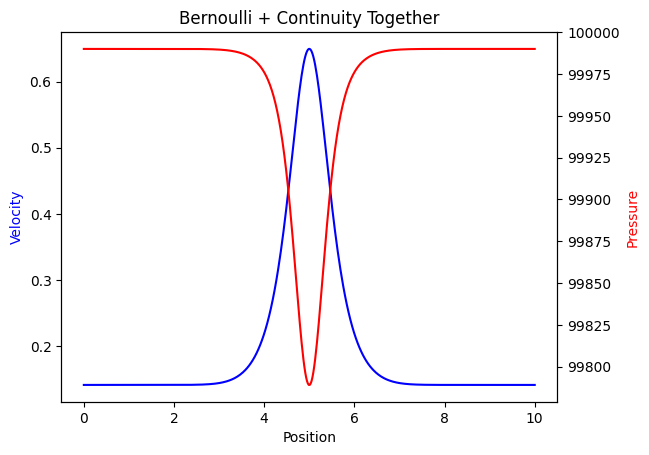

In [8]:
fig, ax1 = plt.subplots()

ax1.plot(x, velocity, 'b')
ax1.set_xlabel("Position")
ax1.set_ylabel("Velocity", color='b')

ax2 = ax1.twinx()
ax2.plot(x, pressure, 'r')
ax2.set_ylabel("Pressure", color='r')

plt.title("Bernoulli + Continuity Together")
plt.show()

This closely resembles the plot we generated earlier with velocity and cross-sectional area. This is because all of these variables are proportional to each other.

A common statement is:

“Fast-moving fluid has low pressure.”

This phrasing is misleading and not always true. A more accurate statement is:

"Pressure and velocity adjust together to conserve energy."

Velocity does not cause pressure to drop. Both are consequences of conservation laws acting simultaneously.

---
## Part 2B — Why Bernoulli fails in real blood flow

Using the above cells:
- Increase vessel length
- Keep narrowing the same

Does this result in any changes?

Bernoulli’s equation assumes:
- No energy loss
- No friction or viscosity

Blood flow in real vessels violates both assumptions. As a result:
- Pressure drops continuously along vessels
- Energy is dissipated as heat
- Bernoulli alone cannot describe circulation

This motivates the introduction of viscous resistance and Poiseuille flow, which will cover next.

---
## 🩸 Part 3 — Blood Flow in a Cylindrical Vessel (Poiseuille’s Law)

Bernoulli's principle assumes that no energy is lost as the fluid flows. This assumption works reasonably well for short, wide pipes or rapidly moving fluids, but it breaks down in many biological systems. Blood flowing through vessels experiences friction due to the fluid’s viscosity. As a result, mechanical energy is continuously converted into heat, and pressure decreases steadily along the vessel.

To model this energy loss, we must explicitly include the effects of viscosity.

### What is Viscosity?
Viscosity is a measure of a fluid’s resistance to deformation or flow. Intuitively, it describes how “thick” or “sticky” a fluid feels.

- Low-viscosity fluids (e.g., water) flow easily

- High-viscosity fluids (e.g., honey) resist motion

In a vessel, viscosity causes neighboring layers of fluid to resist sliding past one another. This internal friction slows the flow and requires a pressure difference to maintain motion. When fluid flows slowly through a narrow, straight tube, the motion is typically laminar. In laminar flow:
- Fluid moves in smooth, parallel layers
- The velocity is highest at the center of the vessel
- The velocity goes to zero at the vessel walls

This velocity pattern arises because fluid at the wall must be stationary relative to the wall, while fluid farther away experiences less friction.

### Poiseuille’s Law
For steady, laminar flow of an incompressible, viscous fluid through a cylindrical vessel, the volumetric flow rate is given by Poiseuille’s Law:

$$ 
Q = \frac{\pi  r^4 \Delta P}{8 \eta L}
$$

Where:
- $Q$: volumetric flow rate (m³/s)  
- $\Delta P$: pressure drop (Pa)  
- $r$: vessel radius (m)  
- $\eta$: viscosity (Pa·s)  
- $L$: vessel length (m)

### Key takeaway
**The $r^4$ dependence means that even small changes in vessel radius can have dramatic effects on flow.**

### Sensitivity to vessel radius
To explore the strong dependence on radius, we compute flow rate for a range of vessel radii while keeping all other parameters fixed.

In [11]:
# Baseline vessel parameters
deltaP = 2000      # Pa
r = 2e-3           # m
eta = 3.5e-3        # Pa*s
L = 0.2            # m

Q = math.pi * deltaP * r**4 / (8 * eta * L)
Q

1.7951958020513104e-05

Convert this to **mL/s** for intuition:


In [12]:
Q_ml_s = Q * 1e6
Q_ml_s

17.951958020513104

### Try this
Change the vessel radius slightly. Notice the dramatic change in flow.


---
## 📈 Part 4 — Flow Rate vs Vessel Radius

We now sweep vessel radius and visualize flow.


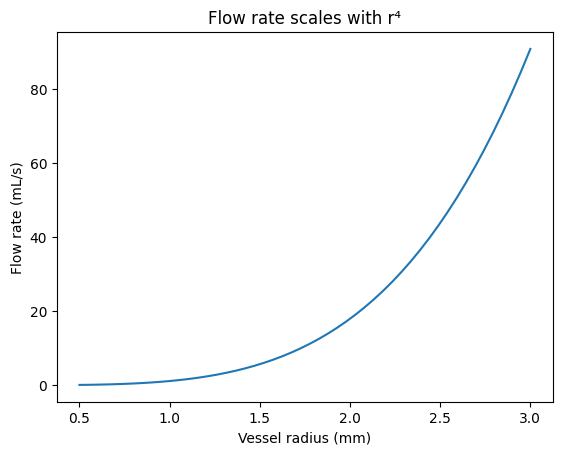

In [13]:
radii = np.linspace(0.5e-3, 3e-3, 50)
flow_rates = math.pi * deltaP * radii**4 / (8 * eta * L)

plt.plot(radii*1e3, flow_rates*1e6)
plt.xlabel("Vessel radius (mm)")
plt.ylabel("Flow rate (mL/s)")
plt.title("Flow rate scales with r⁴")
plt.show()

This steep curve explains why **vasodilation and vasoconstriction**
are powerful physiological controls.


---
## 🧪 Part 5 — Effect of Viscosity

Blood viscosity depends on:
- Hematocrit
- Temperature
- Disease state

Higher viscosity → lower flow.


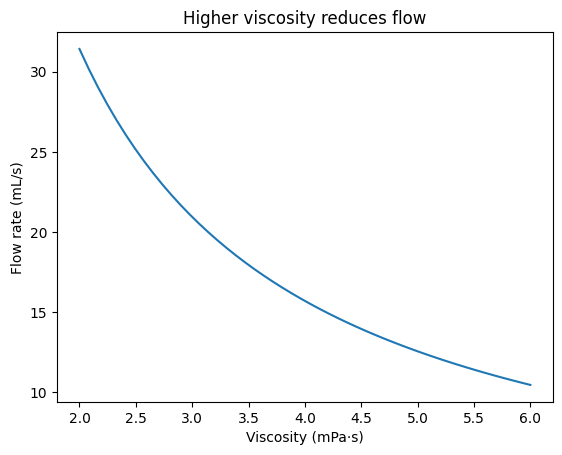

In [14]:
viscosities = np.linspace(2e-3, 6e-3, 50)
flow_eta = math.pi * deltaP * r**4 / (8 * viscosities * L)

plt.plot(viscosities*1e3, flow_eta*1e6)
plt.xlabel("Viscosity (mPa·s)")
plt.ylabel("Flow rate (mL/s)")
plt.title("Higher viscosity reduces flow")
plt.show()

---
## 🚧 Part 6 — Stenosis: Narrowing of Blood Vessels

Stenosis reduces vessel radius locally, increasing resistance. Equation of continuity would predict that this would cause a large increase in blood velocity, but this ignores the added resistance that a smaller vessel generates. We can use Poiseuille’s Law to predict how a decrease in vessel radius leads to a change in flow

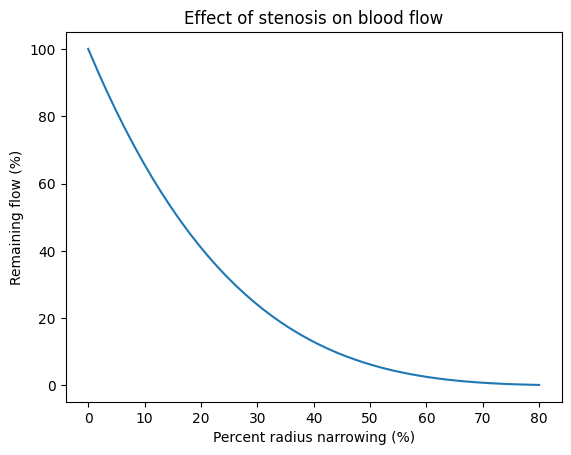

In [15]:
# Percent narrowing
stenosis = np.linspace(0, 0.8, 50)  # 0–80% radius reduction
effective_radius = r * (1 - stenosis)

flow_stenosis = math.pi * deltaP * effective_radius**4 / (8 * eta * L)

plt.plot(stenosis*100, flow_stenosis/flow_stenosis[0]*100)
plt.xlabel("Percent radius narrowing (%)")
plt.ylabel("Remaining flow (%)")
plt.title("Effect of stenosis on blood flow")
plt.show()

A **50% radius reduction** leads to far more than a 50% flow reduction.


### When Poiseuille’s Law applies (and when it does not)

Poiseuille’s Law assumes:
- Laminar flow
- A straight, cylindrical vessel
- Constant viscosity
- Rigid vessel walls

Real blood vessels violate some of these assumptions, but Poiseuille’s Law still provides a remarkably good first-order model for many physiological flows.

---
## 🧠 Big Picture Takeaways

- Blood flow is extremely sensitive to vessel radius
- Viscosity and stenosis strongly regulate circulation

Fluid dynamics connects **physics directly to physiology**.


---
## ✅ Final Checklist

You should now be able to:

- [ ] Predict how flow changes with vessel radius
- [ ] Explain why stenosis is dangerous
- [ ] Describe how viscosity affects circulation

You are now ready for **thermodynamics and heat transfer**.
